In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# Function Definitions

def calculate_speed_of_sound(temperature):
    """Calculate the speed of sound based on temperature."""
    return np.sqrt(1.4 * 1716.59 * (temperature + 460))

def calculate_air_pressure(altitude):
    """Calculate air pressure based on altitude."""
    T = 59 - 0.00356 * altitude
    P = 2116 * ((T + 459.7) / 518.6)**5.256
    return P

def flutter_boundary_speed(root_chord, tip_chord, thickness, semi_span, shear_modulus, altitude):
    """Calculate fin flutter speed using the Flutter Boundary Equation."""
    AR = (root_chord + tip_chord) / thickness
    λ = tip_chord / root_chord
    C = shear_modulus
    P = calculate_air_pressure(altitude)
    T = 59 - 0.00356 * altitude
    a = calculate_speed_of_sound(T)
    V_f = a * np.sqrt((1.337 * AR**2 * P * (λ + 1)) / ((2 * AR + 2)**(-1/3) * C))
    return V_f

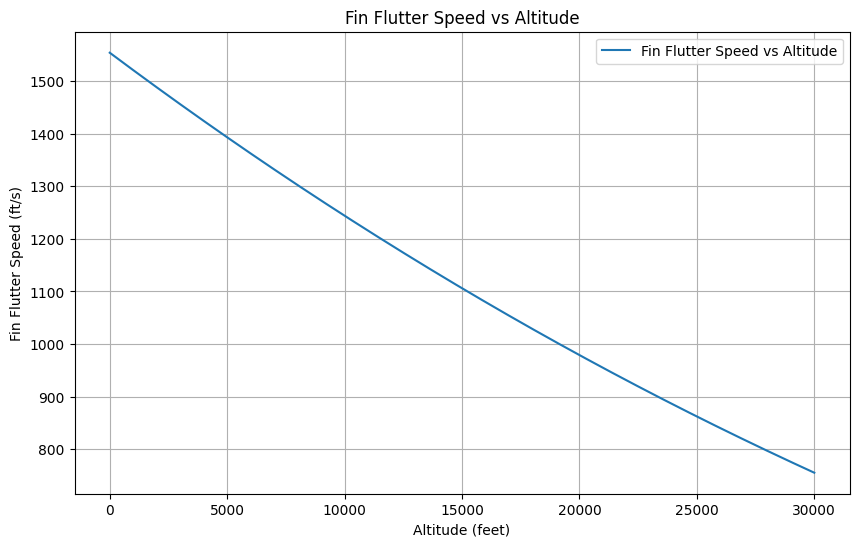

"\nCalculations of the fin flutter speed based on the provided fin dimensions and material properties at varying altitudes.\n\nVariables: root_chord, tip_chord, thickness, semi_span define the geometrical properties of the fin. shear_modulus represents the material's resistance to shear stress.\n\nThe flutter speed is calculated using the 'flutter_boundary_speed' function, which takes into account the altitude's effect on atmospheric conditions affecting fin performance.\n\nThe plot shows how fin flutter speed varies with altitude, providing insight into the operational limits and stability of the fin at different heights.\n"

In [3]:
# Variables, Data Preparation, & Fin Flutter Speed Calculation

# Variables for the flutter speed calculation
root_chord = 11.5  # in inches
tip_chord = 4   # in inches
thickness = 0.25   # in inches
semi_span = 4.75   # in inches 
shear_modulus = 38000000  # psi

# Generate altitude range and calculate speeds
altitudes = np.linspace(0, 30000, 300)  # Altitude from 0 to 30,000 feet
speeds = [flutter_boundary_speed(root_chord, tip_chord, thickness, semi_span, shear_modulus, alt) for alt in altitudes]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(altitudes, speeds, label='Fin Flutter Speed vs Altitude')
plt.title('Fin Flutter Speed vs Altitude')
plt.xlabel('Altitude (feet)')
plt.ylabel('Fin Flutter Speed (ft/s)')
plt.grid(True)
plt.legend()
plt.show()

"""
Calculations of the fin flutter speed based on the provided fin dimensions and material properties at varying altitudes.

Variables: root_chord, tip_chord, thickness, semi_span define the geometrical properties of the fin. shear_modulus represents the material's resistance to shear stress.

The flutter speed is calculated using the 'flutter_boundary_speed' function, which takes into account the altitude's effect on atmospheric conditions affecting fin performance.

The plot shows how fin flutter speed varies with altitude, providing insight into the operational limits and stability of the fin at different heights.
"""


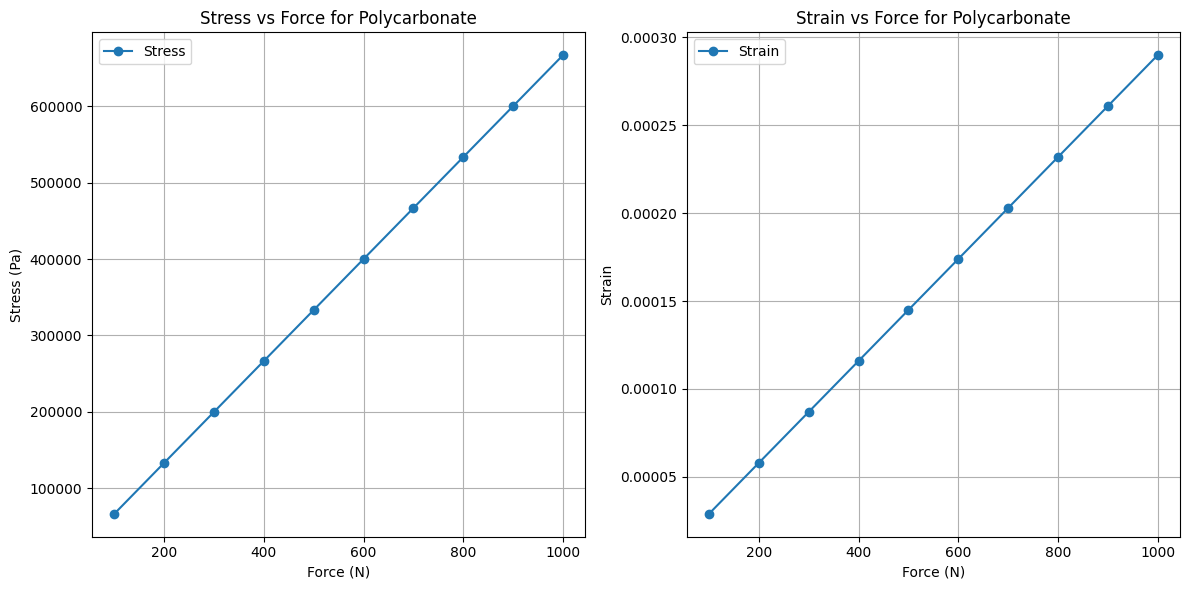

"\nEvaluation of the mechanical stress and strain on fin materials under varying loads, specifically for polycarbonate.\n\nConstants: young_modulus and ultimate_tensile_strength are material-specific constants that describe polycarbonate's elasticity and maximum tensile capacity.\n\nFunctions: calculate_stress computes the stress experienced by the material under a given force and cross-sectional area. calculate_strain computes the material strain resulting from the calculated stress.\n\nThe plots visualize how stress and strain vary with applied force, highlighting the material's response to mechanical loads and helping in assessing the suitability of polycarbonate for specific load conditions.\n"

In [4]:
# Material Properties and Design Constraints

# Constants for Polycarbonate
young_modulus = 2.3e9  # Young's modulus for polycarbonate in Pascals
ultimate_tensile_strength = 65e6  # Approximate ultimate tensile strength in Pascals

# Stress Calculation as a function of force and area
def calculate_stress(force, area):
    return force / area

# Strain Calculation as a function of stress
def calculate_strain(stress):
    return stress / young_modulus

# Plot Stress and Strain for a range of forces
forces = np.linspace(100, 1000, 10)  # Example force range in Newtons
area = 0.0015  # Cross-sectional area in square meters (adjust as necessary)

stresses = calculate_stress(forces, area)
strains = calculate_strain(stresses)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(forces, stresses, '-o', label='Stress')
plt.title('Stress vs Force for Polycarbonate')
plt.xlabel('Force (N)')
plt.ylabel('Stress (Pa)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(forces, strains, '-o', label='Strain')
plt.title('Strain vs Force for Polycarbonate')
plt.xlabel('Force (N)')
plt.ylabel('Strain')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

"""
Evaluation of the mechanical stress and strain on fin materials under varying loads, specifically for polycarbonate.

Constants: young_modulus and ultimate_tensile_strength are material-specific constants that describe polycarbonate's elasticity and maximum tensile capacity.

Functions: calculate_stress computes the stress experienced by the material under a given force and cross-sectional area. calculate_strain computes the material strain resulting from the calculated stress.

The plots visualize how stress and strain vary with applied force, highlighting the material's response to mechanical loads and helping in assessing the suitability of polycarbonate for specific load conditions.
"""


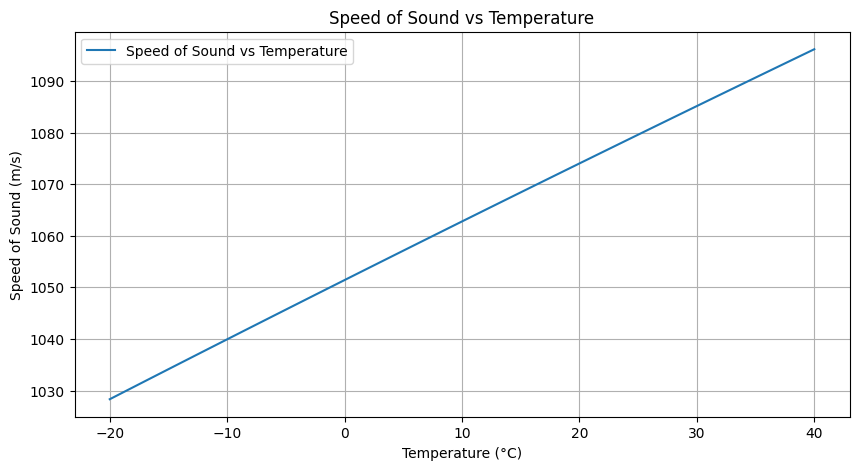

'\nTemperature affect the speed of sound.\n\nVariables: temperatures range from -20°C to 40°C, covering typical operating conditions for many rocket flights.\n\nThe plot shows the relationship between temperature and speed of sound, illustrating how environmental factors can influence aerodynamic behaviors and potentially the performance and stability of flight vehicles.\n'

In [5]:
# Environmental Conditions Effect on Rocket Performance

# Temperature range from -20° to 40° Celcius
temperatures = np.linspace(-20, 40, 61)
speed_of_sound = [calculate_speed_of_sound(temp) for temp in temperatures]

plt.figure(figsize=(10, 5))
plt.plot(temperatures, speed_of_sound, label='Speed of Sound vs Temperature')
plt.title('Speed of Sound vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Speed of Sound (m/s)')
plt.grid(True)
plt.legend()
plt.show()

"""
Temperature affect the speed of sound.

Variables: temperatures range from -20°C to 40°C, covering typical operating conditions for many rocket flights.

The plot shows the relationship between temperature and speed of sound, illustrating how environmental factors can influence aerodynamic behaviors and potentially the performance and stability of flight vehicles.
"""


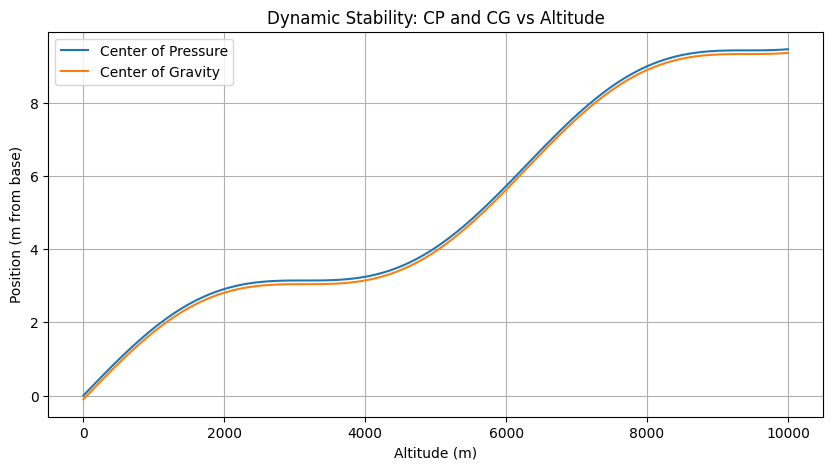

'\nStability of the rocket via analysis of the positions of the center of pressure (CP) and center of gravity (CG) across a range of altitudes.\n\nData: Altitude represents the vertical range over which stability is assessed. CP and CG are calculated to demonstrate the dynamic shift between aerodynamic pressure and gravitational balance points.\n\nVisual representation of CP and CG over altitude, offering analysis into the stability dynamics of the rocket as it ascends.\n'

In [6]:
# Dynamic Stability Analysis

# Data for Center of Pressure (CP) and Center of Gravity (CG)
altitude = np.linspace(0, 10000, 100)  # Altitude range in meters
cp = np.sin(0.001 * altitude) + altitude * 0.001  # Hypothetical CP calculation
cg = cp - 0.1  # CG is always slightly behind CP for stability

plt.figure(figsize=(10, 5))
plt.plot(altitude, cp, label='Center of Pressure')
plt.plot(altitude, cg, label='Center of Gravity')
plt.title('Dynamic Stability: CP and CG vs Altitude')
plt.xlabel('Altitude (m)')
plt.ylabel('Position (m from base)')
plt.legend()
plt.grid(True)
plt.show()

"""
Stability of the rocket via analysis of the positions of the center of pressure (CP) and center of gravity (CG) across a range of altitudes.

Data: Altitude represents the vertical range over which stability is assessed. CP and CG are calculated to demonstrate the dynamic shift between aerodynamic pressure and gravitational balance points.

Visual representation of CP and CG over altitude, offering analysis into the stability dynamics of the rocket as it ascends.
"""


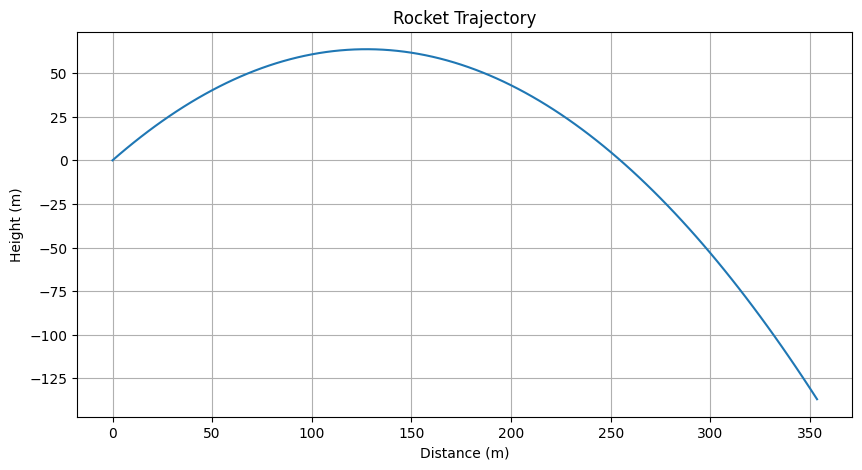

"\nSimulates the trajectory of a rocket based on a basic physics model, incorporating launch angle, initial speed, and gravitational effects.\n\nVariables: Angle, initial_speed, and g represent the launch parameters and gravitational constant, respectively. Time and resulting x, y coordinates are computed to map out the rocket's path over time.\n\nShows the path the rocket would follow under the given launch conditions. This helps in visualizing the reach and apex of the flight, useful for planning and safety assessments.\n"

In [7]:
# Flight Path Simulation

# Basic trajectory simulation
angle = np.radians(45)  # Launch angle of 45 degrees
initial_speed = 50  # Initial speed in m/s
g = 9.81  # Gravity in m/s^2
time = np.linspace(0, 10, 100)  # Time from 0 to 10 seconds
x = initial_speed * np.cos(angle) * time  # Horizontal distance
y = initial_speed * np.sin(angle) * time - 0.5 * g * time**2  # Vertical distance

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.title('Rocket Trajectory')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.show()

"""
Simulates the trajectory of a rocket based on a basic physics model, incorporating launch angle, initial speed, and gravitational effects.

Variables: Angle, initial_speed, and g represent the launch parameters and gravitational constant, respectively. Time and resulting x, y coordinates are computed to map out the rocket's path over time.

Shows the path the rocket would follow under the given launch conditions. This helps in visualizing the reach and apex of the flight, useful for planning and safety assessments.
"""


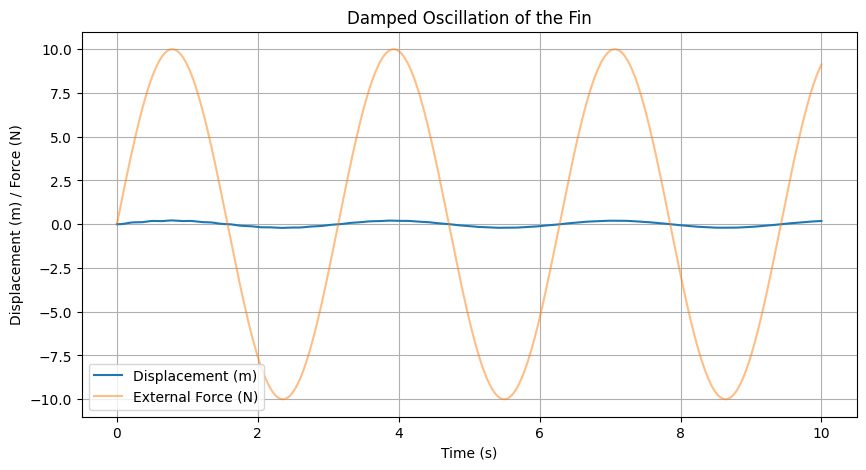

"\nBasic Model of Oscillation\n\nA simple harmonic oscillator model where the oscillation of the fin is put down as a second-order differential equation typically used for damped harmonic motion.\n\nEquation of Motion | Equation for a damped harmonic oscillator: mx'' + cx' + kx = F(t)\nm is the mass of the oscillator (fin)\nc is the damping coefficient\nk is the spring constant (related to the stiffness of the fin)\nx is the displacement\nx' and x'' are the first and second derivatives of displacement (veolcity and acceleration)\nF(t) is the driving force, which could be due to aerodynamic forces\n"

In [8]:
# Simulating and Plotting Oscillations

# Constants for the simulation
m = 0.1  # mass of the fin in kg
c = 0.05  # damping coefficient
k = 50    # spring constant in N/m
omega = 2  # frequency of external force

# Time settings
t = np.linspace(0, 10, 500)  # time from 0 to 10 seconds

# External force, oscillating aerodynamically
def external_force(t):
    return 10 * np.sin(omega * t)

# Differential equation for the system
def damped_oscillator(t, y):
    x, v = y
    dxdt = v
    dvdt = (-c * v - k * x + external_force(t)) / m
    return [dxdt, dvdt]

# Initial conditions: [initial position, initial velocity]
initial_conditions = [0, 0]

# Solve the differential equation
sol = solve_ivp(damped_oscillator, [t.min(), t.max()], initial_conditions, t_eval=t, vectorized=True)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='Displacement (m)')
plt.plot(sol.t, external_force(sol.t), label='External Force (N)', alpha=0.5)
plt.title('Damped Oscillation of the Fin')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m) / Force (N)')
plt.legend()
plt.grid(True)
plt.show()

"""
Basic Model of Oscillation

A simple harmonic oscillator model where the oscillation of the fin is put down as a second-order differential equation typically used for damped harmonic motion.

Equation of Motion | Equation for a damped harmonic oscillator: mx'' + cx' + kx = F(t)
m is the mass of the oscillator (fin)
c is the damping coefficient
k is the spring constant (related to the stiffness of the fin)
x is the displacement
x' and x'' are the first and second derivatives of displacement (veolcity and acceleration)
F(t) is the driving force, which could be due to aerodynamic forces
"""